In [4]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [8]:
trans = pd.read_csv('OSM/seasonal_transport.csv')
trans

,Unnamed: 0,section,s17,s18,s19,s20,s21,w17,w18,w19,w20
0,0,North,36001.407662,20739.513205,29694.396204,29249.933502,23714.547157,1222.510471,4075.179788,105.115077,1599.091127
1,1,Offshore,56938.926803,29584.436351,38934.594586,27681.862287,25807.576775,1102.182301,10431.624431,19031.378979,20504.766745
2,2,CUC,13321.089314,24482.788245,21889.093795,23301.486874,27032.147283,6004.649440,3111.132263,4693.671586,3483.374564
3,3,South,30879.517139,41759.759185,25091.337635,33381.325008,41892.099779,69644.776539,59654.582407,47625.999999,53956.508880
4,4,Columbia,366.012450,6109.751725,955.977302,2160.731477,1653.526224,22537.884565,14764.130187,17929.440577,16163.981853
5,5,loop,39988.132894,44638.056786,42853.733619,43595.769762,45740.702593,53822.452719,49359.508083,48512.583298,58123.358084


In [25]:
# lets look at the sections as indexes for ease of analysis
nor = 0
off = 1
cuc = 2
sou = 3
col = 4
loo = 5

In [76]:
tracers = pd.read_csv('./OSM/tracers.csv')
tracers.head()

,Unnamed: 0,salt,temperature,transport,depth,season,year,section
0,3,30.715387,9.134833,0.002187,18.089465,summer,2017.0,loop
1,51,27.029570,10.487689,0.002511,2.196340,summer,2017.0,loop
2,101,29.024899,9.943184,0.002381,5.138868,summer,2017.0,loop
3,2690,29.043703,9.957072,0.002384,5.637972,summer,2017.0,loop
4,2790,28.461721,10.375201,0.002484,17.259097,summer,2017.0,loop


# Summer

In [41]:
# summer mean
Snorth = np.mean([trans.s17[nor],trans.s18[nor],trans.s19[nor],trans.s20[nor],trans.s21[nor]])
Ssouth = np.mean([trans.s17[sou],trans.s18[sou],trans.s19[sou],trans.s20[sou],trans.s21[sou]])
Soffshore = np.mean([trans.s17[off],trans.s18[off],trans.s19[off],trans.s20[off],trans.s21[off]])
Scuc = np.mean([trans.s17[cuc],trans.s18[cuc],trans.s19[cuc],trans.s20[cuc],trans.s21[cuc]])
Scol = np.mean([trans.s17[col],trans.s18[col],trans.s19[col],trans.s20[col],trans.s21[col]])
Sloop = np.mean([trans.s17[loo],trans.s18[loo],trans.s19[loo],trans.s20[loo],trans.s21[loo]])

/tmp/ipykernel_116938/3430158730.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(sources,rotation=30, ha='right')


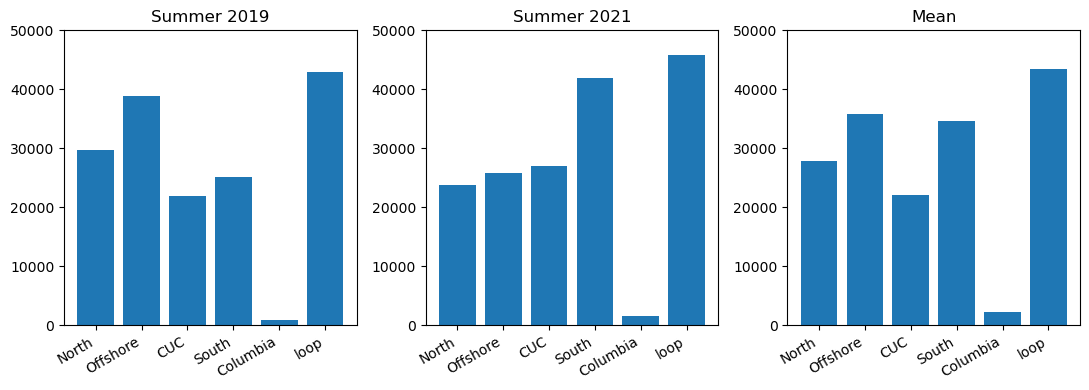

In [32]:
fig, ax = plt.subplots(1,3,figsize=(11,4))

sources = ['North','Offshore','CUC','South','Columbia','loop']

ax[0].bar(sources,[trans.s19[nor],trans.s19[off],trans.s19[cuc],trans.s19[sou],trans.s19[col],trans.s19[loo]])
ax[1].bar(sources,[trans.s21[nor],trans.s21[off],trans.s21[cuc],trans.s21[sou],trans.s21[col],trans.s21[loo]])
ax[2].bar(sources,[Snorth,Soffshore,Scuc,Ssouth,Scol,Sloop])

ax[0].set_title('Summer 2019') # high O2 summer
ax[1].set_title('Summer 2021') # hypoxia summer
ax[2].set_title('Mean')

for axs in ax:
    axs.set_ylim([0,50000])
    axs.set_xticklabels(sources,rotation=30, ha='right')

plt.tight_layout()

In [87]:
summer_salt = [tracers.salt[(tracers.section=='north')&(tracers.season=='summer')],
               tracers.salt[(tracers.section=='offshore')&(tracers.season=='summer')],
               tracers.salt[(tracers.section=='cuc')&(tracers.season=='summer')],
               tracers.salt[(tracers.section=='south')&(tracers.season=='summer')],
               tracers.salt[(tracers.section=='columbia')&(tracers.season=='summer')],
               tracers.salt[(tracers.section=='loop')&(tracers.season=='summer')]]

s19_salt = [np.average(tracers.salt[(tracers.section=='north')&(tracers.season=='summer')&(tracers.year==2019)],weights=tracers.transport[(tracers.section=='north')&(tracers.season=='summer')&(tracers.year==2019)]),
               np.average(tracers.salt[(tracers.section=='offshore')&(tracers.season=='summer')&(tracers.year==2019)],weights=tracers.transport[(tracers.section=='offshore')&(tracers.season=='summer')&(tracers.year==2019)]),
               np.average(tracers.salt[(tracers.section=='cuc')&(tracers.season=='summer')&(tracers.year==2019)],weights=tracers.transport[(tracers.section=='cuc')&(tracers.season=='summer')&(tracers.year==2019)]),
               np.average(tracers.salt[(tracers.section=='south')&(tracers.season=='summer')&(tracers.year==2019)],weights=tracers.transport[(tracers.section=='south')&(tracers.season=='summer')&(tracers.year==2019)]),
               np.average(tracers.salt[(tracers.section=='columbia')&(tracers.season=='summer')&(tracers.year==2019)],weights=tracers.transport[(tracers.section=='columbia')&(tracers.season=='summer')&(tracers.year==2019)]),
               np.average(tracers.salt[(tracers.section=='loop')&(tracers.season=='summer')&(tracers.year==2019)],weights=tracers.transport[(tracers.section=='loop')&(tracers.season=='summer')&(tracers.year==2019)])]

s21_salt = [np.average(tracers.salt[(tracers.section=='north')&(tracers.season=='summer')&(tracers.year==2021)],weights=tracers.transport[(tracers.section=='north')&(tracers.season=='summer')&(tracers.year==2021)]),
               np.average(tracers.salt[(tracers.section=='offshore')&(tracers.season=='summer')&(tracers.year==2021)],weights=tracers.transport[(tracers.section=='offshore')&(tracers.season=='summer')&(tracers.year==2021)]),
               np.average(tracers.salt[(tracers.section=='cuc')&(tracers.season=='summer')&(tracers.year==2021)],weights=tracers.transport[(tracers.section=='cuc')&(tracers.season=='summer')&(tracers.year==2021)]),
               np.average(tracers.salt[(tracers.section=='south')&(tracers.season=='summer')&(tracers.year==2021)],weights=tracers.transport[(tracers.section=='south')&(tracers.season=='summer')&(tracers.year==2021)]),
               np.average(tracers.salt[(tracers.section=='columbia')&(tracers.season=='summer')&(tracers.year==2021)],weights=tracers.transport[(tracers.section=='columbia')&(tracers.season=='summer')&(tracers.year==2021)]),
               np.average(tracers.salt[(tracers.section=='loop')&(tracers.season=='summer')&(tracers.year==2021)],weights=tracers.transport[(tracers.section=='loop')&(tracers.season=='summer')&(tracers.year==2021)])]

summer_temp = [tracers.temperature[(tracers.section=='north')&(tracers.season=='summer')],
               tracers.temperature[(tracers.section=='offshore')&(tracers.season=='summer')],
               tracers.temperature[(tracers.section=='cuc')&(tracers.season=='summer')],
               tracers.temperature[(tracers.section=='south')&(tracers.season=='summer')],
               tracers.temperature[(tracers.section=='columbia')&(tracers.season=='summer')],
               tracers.temperature[(tracers.section=='loop')&(tracers.season=='summer')]]

s19_temp = [np.average(tracers.temperature[(tracers.section=='north')&(tracers.season=='summer')&(tracers.year==2019)],weights=tracers.transport[(tracers.section=='north')&(tracers.season=='summer')&(tracers.year==2019)]),
               np.average(tracers.temperature[(tracers.section=='offshore')&(tracers.season=='summer')&(tracers.year==2019)],weights=tracers.transport[(tracers.section=='offshore')&(tracers.season=='summer')&(tracers.year==2019)]),
               np.average(tracers.temperature[(tracers.section=='cuc')&(tracers.season=='summer')&(tracers.year==2019)],weights=tracers.transport[(tracers.section=='cuc')&(tracers.season=='summer')&(tracers.year==2019)]),
               np.average(tracers.temperature[(tracers.section=='south')&(tracers.season=='summer')&(tracers.year==2019)],weights=tracers.transport[(tracers.section=='south')&(tracers.season=='summer')&(tracers.year==2019)]),
               np.average(tracers.temperature[(tracers.section=='columbia')&(tracers.season=='summer')&(tracers.year==2019)],weights=tracers.transport[(tracers.section=='columbia')&(tracers.season=='summer')&(tracers.year==2019)]),
               np.average(tracers.temperature[(tracers.section=='loop')&(tracers.season=='summer')&(tracers.year==2019)],weights=tracers.transport[(tracers.section=='loop')&(tracers.season=='summer')&(tracers.year==2019)])]

s21_temp = [np.average(tracers.temperature[(tracers.section=='north')&(tracers.season=='summer')&(tracers.year==2021)],weights=tracers.transport[(tracers.section=='north')&(tracers.season=='summer')&(tracers.year==2021)]),
               np.average(tracers.temperature[(tracers.section=='offshore')&(tracers.season=='summer')&(tracers.year==2021)],weights=tracers.transport[(tracers.section=='offshore')&(tracers.season=='summer')&(tracers.year==2021)]),
               np.average(tracers.temperature[(tracers.section=='cuc')&(tracers.season=='summer')&(tracers.year==2021)],weights=tracers.transport[(tracers.section=='cuc')&(tracers.season=='summer')&(tracers.year==2021)]),
               np.average(tracers.temperature[(tracers.section=='south')&(tracers.season=='summer')&(tracers.year==2021)],weights=tracers.transport[(tracers.section=='south')&(tracers.season=='summer')&(tracers.year==2021)]),
               np.average(tracers.temperature[(tracers.section=='columbia')&(tracers.season=='summer')&(tracers.year==2021)],weights=tracers.transport[(tracers.section=='columbia')&(tracers.season=='summer')&(tracers.year==2021)]),
               np.average(tracers.temperature[(tracers.section=='loop')&(tracers.season=='summer')&(tracers.year==2021)],weights=tracers.transport[(tracers.section=='loop')&(tracers.season=='summer')&(tracers.year==2021)])]

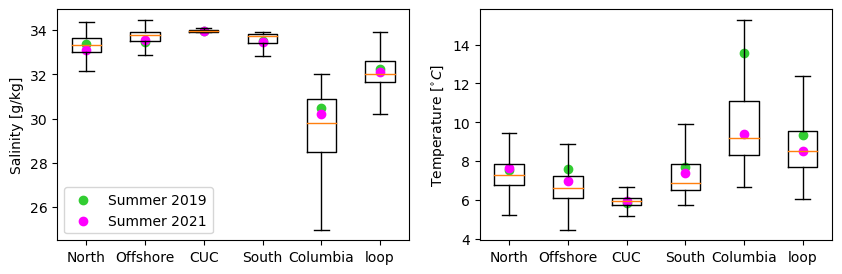

In [99]:
# box limits are quartiles
# first quartile (Q1), is the value under which 25% of data points are found when they are arranged in increasing order
# third quartile (Q3), is the value under which 75% of data points are found when arranged in increasing order
# the whiskers are based on the equation Q3 + whis*(Q3-Q1) and Q1 - whis*(Q3-Q1)

fig, ax = plt.subplots(1,2,figsize=(10,3))

# salt
ax[0].boxplot(summer_salt,showfliers=False)
ax[0].set_xticklabels(sources)
ax[0].set_ylabel('Salinity [g/kg]')

# temp
ax[1].boxplot(summer_temp,showfliers=False)
ax[1].set_xticklabels(sources)
ax[1].set_ylabel('Temperature [$^{\circ}C$]')

# year of interest
ax[0].scatter(np.arange(6)+1, s19_salt, color='limegreen', label='Summer 2019')
ax[1].scatter(np.arange(6)+1,s19_temp, color='limegreen')
ax[0].scatter(np.arange(6)+1,s21_salt, color='magenta', label='Summer 2021')
ax[1].scatter(np.arange(6)+1,s21_temp, color='magenta')
ax[0].legend()

In [42]:
# winter mean
Wnorth = np.mean([trans.w17[nor],trans.w18[nor],trans.w19[nor],trans.w20[nor]])
Wsouth = np.mean([trans.w17[sou],trans.w18[sou],trans.w19[sou],trans.w20[sou]])
Woffshore = np.mean([trans.w17[off],trans.w18[off],trans.w19[off],trans.w20[off]])
Wcuc = np.mean([trans.w17[cuc],trans.w18[cuc],trans.w19[cuc],trans.w20[cuc]])
Wcol = np.mean([trans.w17[col],trans.w18[col],trans.w19[col],trans.w20[col]])
Wloop = np.mean([trans.w17[loo],trans.w18[loo],trans.w19[loo],trans.w20[loo]])

/tmp/ipykernel_116938/1700282906.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(sources,rotation=30, ha='right')


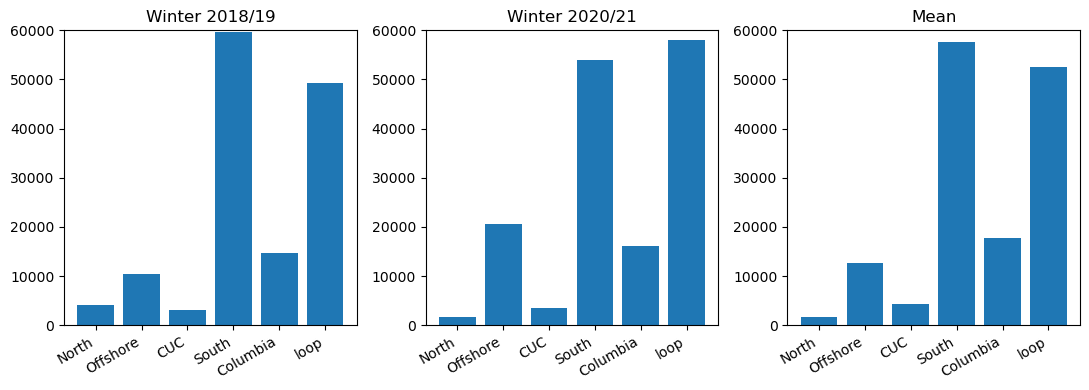

In [46]:
fig, ax = plt.subplots(1,3,figsize=(11,4))

sources = ['North','Offshore','CUC','South','Columbia','loop']

ax[0].bar(sources,[trans.w18[nor],trans.w18[off],trans.w18[cuc],trans.w18[sou],trans.w18[col],trans.w18[loo]])
ax[1].bar(sources,[trans.w20[nor],trans.w20[off],trans.w20[cuc],trans.w20[sou],trans.w20[col],trans.w20[loo]])
ax[2].bar(sources,[Wnorth, Woffshore,Wcuc,Wsouth,Wcol,Wloop])

ax[0].set_title('Winter 2018/19') # strong downwelling winter
ax[1].set_title('Winter 2020/21') # weak downwelling winter
ax[2].set_title('Mean')

for axs in ax:
    axs.set_ylim([0,60000])
    axs.set_xticklabels(sources,rotation=30, ha='right')

plt.tight_layout()

In [89]:
winter_salt = [tracers.salt[(tracers.section=='north')&(tracers.season=='winter')],
               tracers.salt[(tracers.section=='offshore')&(tracers.season=='winter')],
               tracers.salt[(tracers.section=='cuc')&(tracers.season=='winter')],
               tracers.salt[(tracers.section=='south')&(tracers.season=='winter')],
               tracers.salt[(tracers.section=='columbia')&(tracers.season=='winter')],
               tracers.salt[(tracers.section=='loop')&(tracers.season=='winter')]]

w18_salt = [np.average(tracers.salt[(tracers.section=='north')&(tracers.season=='winter')&(tracers.year==2018)],weights=tracers.transport[(tracers.section=='north')&(tracers.season=='winter')&(tracers.year==2018)]),
               np.average(tracers.salt[(tracers.section=='offshore')&(tracers.season=='winter')&(tracers.year==2018)],weights=tracers.transport[(tracers.section=='offshore')&(tracers.season=='winter')&(tracers.year==2018)]),
               np.average(tracers.salt[(tracers.section=='cuc')&(tracers.season=='winter')&(tracers.year==2018)],weights=tracers.transport[(tracers.section=='cuc')&(tracers.season=='winter')&(tracers.year==2018)]),
               np.average(tracers.salt[(tracers.section=='south')&(tracers.season=='winter')&(tracers.year==2018)],weights=tracers.transport[(tracers.section=='south')&(tracers.season=='winter')&(tracers.year==2018)]),
               np.average(tracers.salt[(tracers.section=='columbia')&(tracers.season=='winter')&(tracers.year==2018)],weights=tracers.transport[(tracers.section=='columbia')&(tracers.season=='winter')&(tracers.year==2018)]),
               np.average(tracers.salt[(tracers.section=='loop')&(tracers.season=='winter')&(tracers.year==2018)],weights=tracers.transport[(tracers.section=='loop')&(tracers.season=='winter')&(tracers.year==2018)])]

w20_salt = [np.average(tracers.salt[(tracers.section=='north')&(tracers.season=='winter')&(tracers.year==2020)],weights=tracers.transport[(tracers.section=='north')&(tracers.season=='winter')&(tracers.year==2020)]),
               np.average(tracers.salt[(tracers.section=='offshore')&(tracers.season=='winter')&(tracers.year==2020)],weights=tracers.transport[(tracers.section=='offshore')&(tracers.season=='winter')&(tracers.year==2020)]),
               np.average(tracers.salt[(tracers.section=='cuc')&(tracers.season=='winter')&(tracers.year==2020)],weights=tracers.transport[(tracers.section=='cuc')&(tracers.season=='winter')&(tracers.year==2020)]),
               np.average(tracers.salt[(tracers.section=='south')&(tracers.season=='winter')&(tracers.year==2020)],weights=tracers.transport[(tracers.section=='south')&(tracers.season=='winter')&(tracers.year==2020)]),
               np.average(tracers.salt[(tracers.section=='columbia')&(tracers.season=='winter')&(tracers.year==2020)],weights=tracers.transport[(tracers.section=='columbia')&(tracers.season=='winter')&(tracers.year==2020)]),
               np.average(tracers.salt[(tracers.section=='loop')&(tracers.season=='winter')&(tracers.year==2020)],weights=tracers.transport[(tracers.section=='loop')&(tracers.season=='winter')&(tracers.year==2020)])]

winter_temp = [tracers.temperature[(tracers.section=='north')&(tracers.season=='winter')],
               tracers.temperature[(tracers.section=='offshore')&(tracers.season=='winter')],
               tracers.temperature[(tracers.section=='cuc')&(tracers.season=='winter')],
               tracers.temperature[(tracers.section=='south')&(tracers.season=='winter')],
               tracers.temperature[(tracers.section=='columbia')&(tracers.season=='winter')],
               tracers.temperature[(tracers.section=='loop')&(tracers.season=='winter')]]

w18_temp = [np.average(tracers.temperature[(tracers.section=='north')&(tracers.season=='winter')&(tracers.year==2018)],weights=tracers.transport[(tracers.section=='north')&(tracers.season=='winter')&(tracers.year==2018)]),
               np.average(tracers.temperature[(tracers.section=='offshore')&(tracers.season=='winter')&(tracers.year==2018)],weights=tracers.transport[(tracers.section=='offshore')&(tracers.season=='winter')&(tracers.year==2018)]),
               np.average(tracers.temperature[(tracers.section=='cuc')&(tracers.season=='winter')&(tracers.year==2018)],weights=tracers.transport[(tracers.section=='cuc')&(tracers.season=='winter')&(tracers.year==2018)]),
               np.average(tracers.temperature[(tracers.section=='south')&(tracers.season=='winter')&(tracers.year==2018)],weights=tracers.transport[(tracers.section=='south')&(tracers.season=='winter')&(tracers.year==2018)]),
               np.average(tracers.temperature[(tracers.section=='columbia')&(tracers.season=='winter')&(tracers.year==2018)],weights=tracers.transport[(tracers.section=='columbia')&(tracers.season=='winter')&(tracers.year==2018)]),
               np.average(tracers.temperature[(tracers.section=='loop')&(tracers.season=='winter')&(tracers.year==2018)],weights=tracers.transport[(tracers.section=='loop')&(tracers.season=='winter')&(tracers.year==2018)])]

w20_temp = [np.average(tracers.temperature[(tracers.section=='north')&(tracers.season=='winter')&(tracers.year==2020)],weights=tracers.transport[(tracers.section=='north')&(tracers.season=='winter')&(tracers.year==2020)]),
               np.average(tracers.temperature[(tracers.section=='offshore')&(tracers.season=='winter')&(tracers.year==2020)],weights=tracers.transport[(tracers.section=='offshore')&(tracers.season=='winter')&(tracers.year==2020)]),
               np.average(tracers.temperature[(tracers.section=='cuc')&(tracers.season=='winter')&(tracers.year==2020)],weights=tracers.transport[(tracers.section=='cuc')&(tracers.season=='winter')&(tracers.year==2020)]),
               np.average(tracers.temperature[(tracers.section=='south')&(tracers.season=='winter')&(tracers.year==2020)],weights=tracers.transport[(tracers.section=='south')&(tracers.season=='winter')&(tracers.year==2020)]),
               np.average(tracers.temperature[(tracers.section=='columbia')&(tracers.season=='winter')&(tracers.year==2020)],weights=tracers.transport[(tracers.section=='columbia')&(tracers.season=='winter')&(tracers.year==2020)]),
               np.average(tracers.temperature[(tracers.section=='loop')&(tracers.season=='winter')&(tracers.year==2020)],weights=tracers.transport[(tracers.section=='loop')&(tracers.season=='winter')&(tracers.year==2020)])]

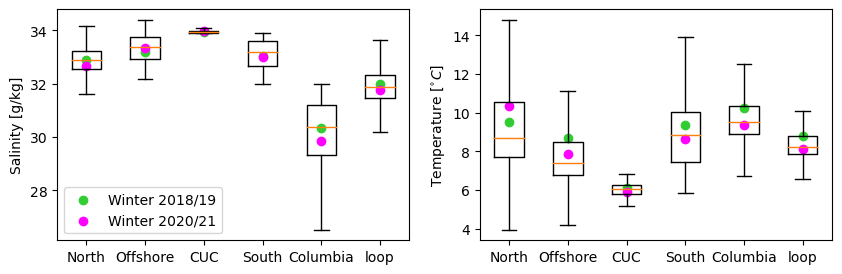

In [101]:
# box limits are quartiles
# first quartile (Q1), is the value under which 25% of data points are found when they are arranged in increasing order
# third quartile (Q3), is the value under which 75% of data points are found when arranged in increasing order
# the whiskers are based on the equation Q3 + whis*(Q3-Q1) and Q1 - whis*(Q3-Q1)

fig, ax = plt.subplots(1,2,figsize=(10,3))

# salt
ax[0].boxplot(winter_salt,showfliers=False)
ax[0].set_xticklabels(sources)
ax[0].set_ylabel('Salinity [g/kg]')

# temp
ax[1].boxplot(winter_temp,showfliers=False)
ax[1].set_xticklabels(sources)
ax[1].set_ylabel('Temperature [$^{\circ}C$]')

# year of interest
ax[0].scatter(np.arange(6)+1, w18_salt, color='limegreen', label='Winter 2018/19')
ax[1].scatter(np.arange(6)+1,w18_temp, color='limegreen')
ax[0].scatter(np.arange(6)+1,w20_salt, color='magenta', label='Winter 2020/21')
ax[1].scatter(np.arange(6)+1,w20_temp, color='magenta')
ax[0].legend()